# **Heart Disease**

# **Research Question:** 
# *How do a person’s health factors influence the likelihood of that person having a heart disease?*

# Introduction

Heart disease is a broad term for many heart conditions. A person can go undiagnosed for most of their life until they experience a major symptom such as a heart attack or even heart failure. Many personal health factors can affect their risk of having a heart disease. This includes, cholesterol, age, and sex. However many recent studies are showing that there may be more factors that can potentially play a role in the cause of heart diseases (Kelley, 2014)

For this analysis, we will be using the UCI Machine Learning Repository's Heart Disease dataset. This dataset includes 14 variables, including age, sex, chest pain type, resting blood pressure, cholesterol level, fasting blood sugar, resting ekg results, maximum heart rate achieved, and exercise induced angina. There are datasets from four different hospitals, however the set from the Cleveland hospital appears to be the only fully processed set, and so it is what will be used for this project. When analyzing this data it is intended to find what health factors can affect a person’s chance of having heart disease.

We are going to work with the forward selection to find the most influential predictors. The first step in this process is to use the select function to extract the predictors that we want to work with. In our code we used all of the predictors listed in our dataset. The next step is to use the paste function. This function will make a model formula for us of all of our predictors. The last step is to create a code that will help us sequentially find the best predictor. 

The code that we create will put our predictors into the model and run them to find which predictor is the most accurate against our predicted attribute column. The code will take each of the predictors through the loop of data and test the accuracy. Once the predictor with the highest accuracy is found it is added to the output data. 



# Methods and Results

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)
set.seed(100022)
#wqad

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

To begin data analysis, the relevant packages are loaded, a seed is set to ensure reproducibility, and the data is read directly from a url.

In [2]:
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

heart_disease <- read_csv(url, col_names=FALSE)
heart_disease

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


Table1.1: Heart disease untidy tibble.

**Tidying and Splitting Data**

As we can see from Table 1.1, the data frame doesn't have labels. The rename function is used to relable the dataset which makes the table more clear to the audience. We can also see that the "ca" and "thal" columns have "?" as a value for some observations, and these columns are of the character data type, so these are filtered out and these columns are redefined as doubles. 

In [3]:
#read and tidy the data
heart_disease_tidy <- heart_disease %>%
    rename(age = X1,
            sex = X2,
          cp = X3,
          trestbps = X4,
          chol = X5,
          fbs = X6,
          restecg =X7,
          thalach = X8,
          exang =X9, 
          oldpeak =X10,
          slope =X11,
          ca = X12,
          thal = X13,
          num = X14) %>%
    filter(ca != "?") %>%
    filter(thal != "?") %>%
    mutate(ca = as.numeric(ca))%>%
    mutate(thal = as.numeric(thal))%>%
    mutate(num = as_factor(num))
heart_disease_tidy

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2,7,2
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Table1.2: Heart disease dataset variables and labels.<br>
Column 1 = Age<br>
Column 2 = Sex<br>
Column 3 = Chest pain type<br>
Column 4 = Resting blood pressure<br>
Column 5 = Cholesterol level<br>
Column 6 = Fasting blood sugar<br>
Column 7 = Resting electrocardiographic results<br>
Column 8 = Maximum heart rate achieved<br>
Column 9 = Exercise induced angina<br>
Column 10 = ST depression induced by exercise relative to rest<br>
Column 11 = The slope of the peak exercise ST segment<br>
Column 12 = Number of major vessels (0-3) colored by fluoroscopy<br>
Column 13 = Thalassemia diagnosis. 3 = normal; 6 = fixed defect; 7 = reversable defect<br>
Column 14 = Diagnosis of heart disease (response variable). When num = 0, there's no risk of heart disease. When num >= 1, there is some amount of heart disease present

**Grouping Num and Splitting Data**

Next, we simplified our response variable "num" from 0 - 4 to 0 - 2. We used the ifelse() function to group num == 1 and 2 to the value 1, and grouped num == 3 and 4 to the value 2. The num value is also renamed to "pred", which stands for predictions. We are able to simplify the response variable, as when num is equal to 1 or 2, it is considered to be low risk heart disease. When num is equal to 3 or 4, it is considered to be moderate and high risk heart disease, respectively. Since pred is now our response variable, we have to mutate this vector into fct using the as_factor () function.

In [4]:
#Grouping the num column for visualization clarity.

heart_disease_num<-mutate(heart_disease_tidy, pred = ifelse(num == 1 | num == 2, 1, ifelse(num == 3 | num == 4, 2, 0))) %>%
               select(-num)%>%
               mutate(pred = as_factor(pred))

Afterward, the dataset is split into training and testing datasets, with the training dataset containing 75% of the original data, and testing dataset containing the remaining 25%. Since our response variable is the "pred" column we just created, we set strata = pred to make sure that both the training and testing dataset contain a similar ratio of "pred" values.

We split and train our data using a 75/25 split. We split the data into training and testing data so that once we have our finalized model, we can test it using data that it has not seen before. The 75% split of the data is used to when building our model and then the 25%  is used when we test the accuracy of the final model. The 75/25 split is arbitrary in theory, however we must ensure that there are enough data points in both sets. This seems to be the case, so by convention we used this ratio. 

In [5]:
#Splitting the data into training and testing datasets.

heart_disease_num_split <- initial_split(heart_disease_num, prop = 0.75, strata = pred)

disease_num_train<-training(heart_disease_num_split)
disease_num_test<-testing(heart_disease_num_split)

disease_num_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,pred
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,4,140,241,0,0,123,1,0.2,2,0,7,1
68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1


Table 2.0: Training dataset with pred being the response variable <br>

**Exploratory Analysis**

The recategorization of the data allows for a clearer distinction between levels of heart disease diagnosis, and creates a greater visual distinction as well. This recategorization effectively creates a "no heart disease", a "medium to mild heart disease" and a "severe heart disease" category. Now that this data has been recategorized, visualizations allow us to see a clearer relationship between our chosen variables. From these plots, we can hypothesize which variables will be the best predictors of heart disease. We can see that in plots containing maximum heart rate, it leads to a noticeable division in the data, with somewhat of a transition in the middle. This also occurs with age and resting blood pressure, suggesting these too may be good predictors. On the other hand, in plots containing cholesterol levels, there is either no apparent difference, or a very slight one, along its axis, suggesting it may not possess as much predictive power.

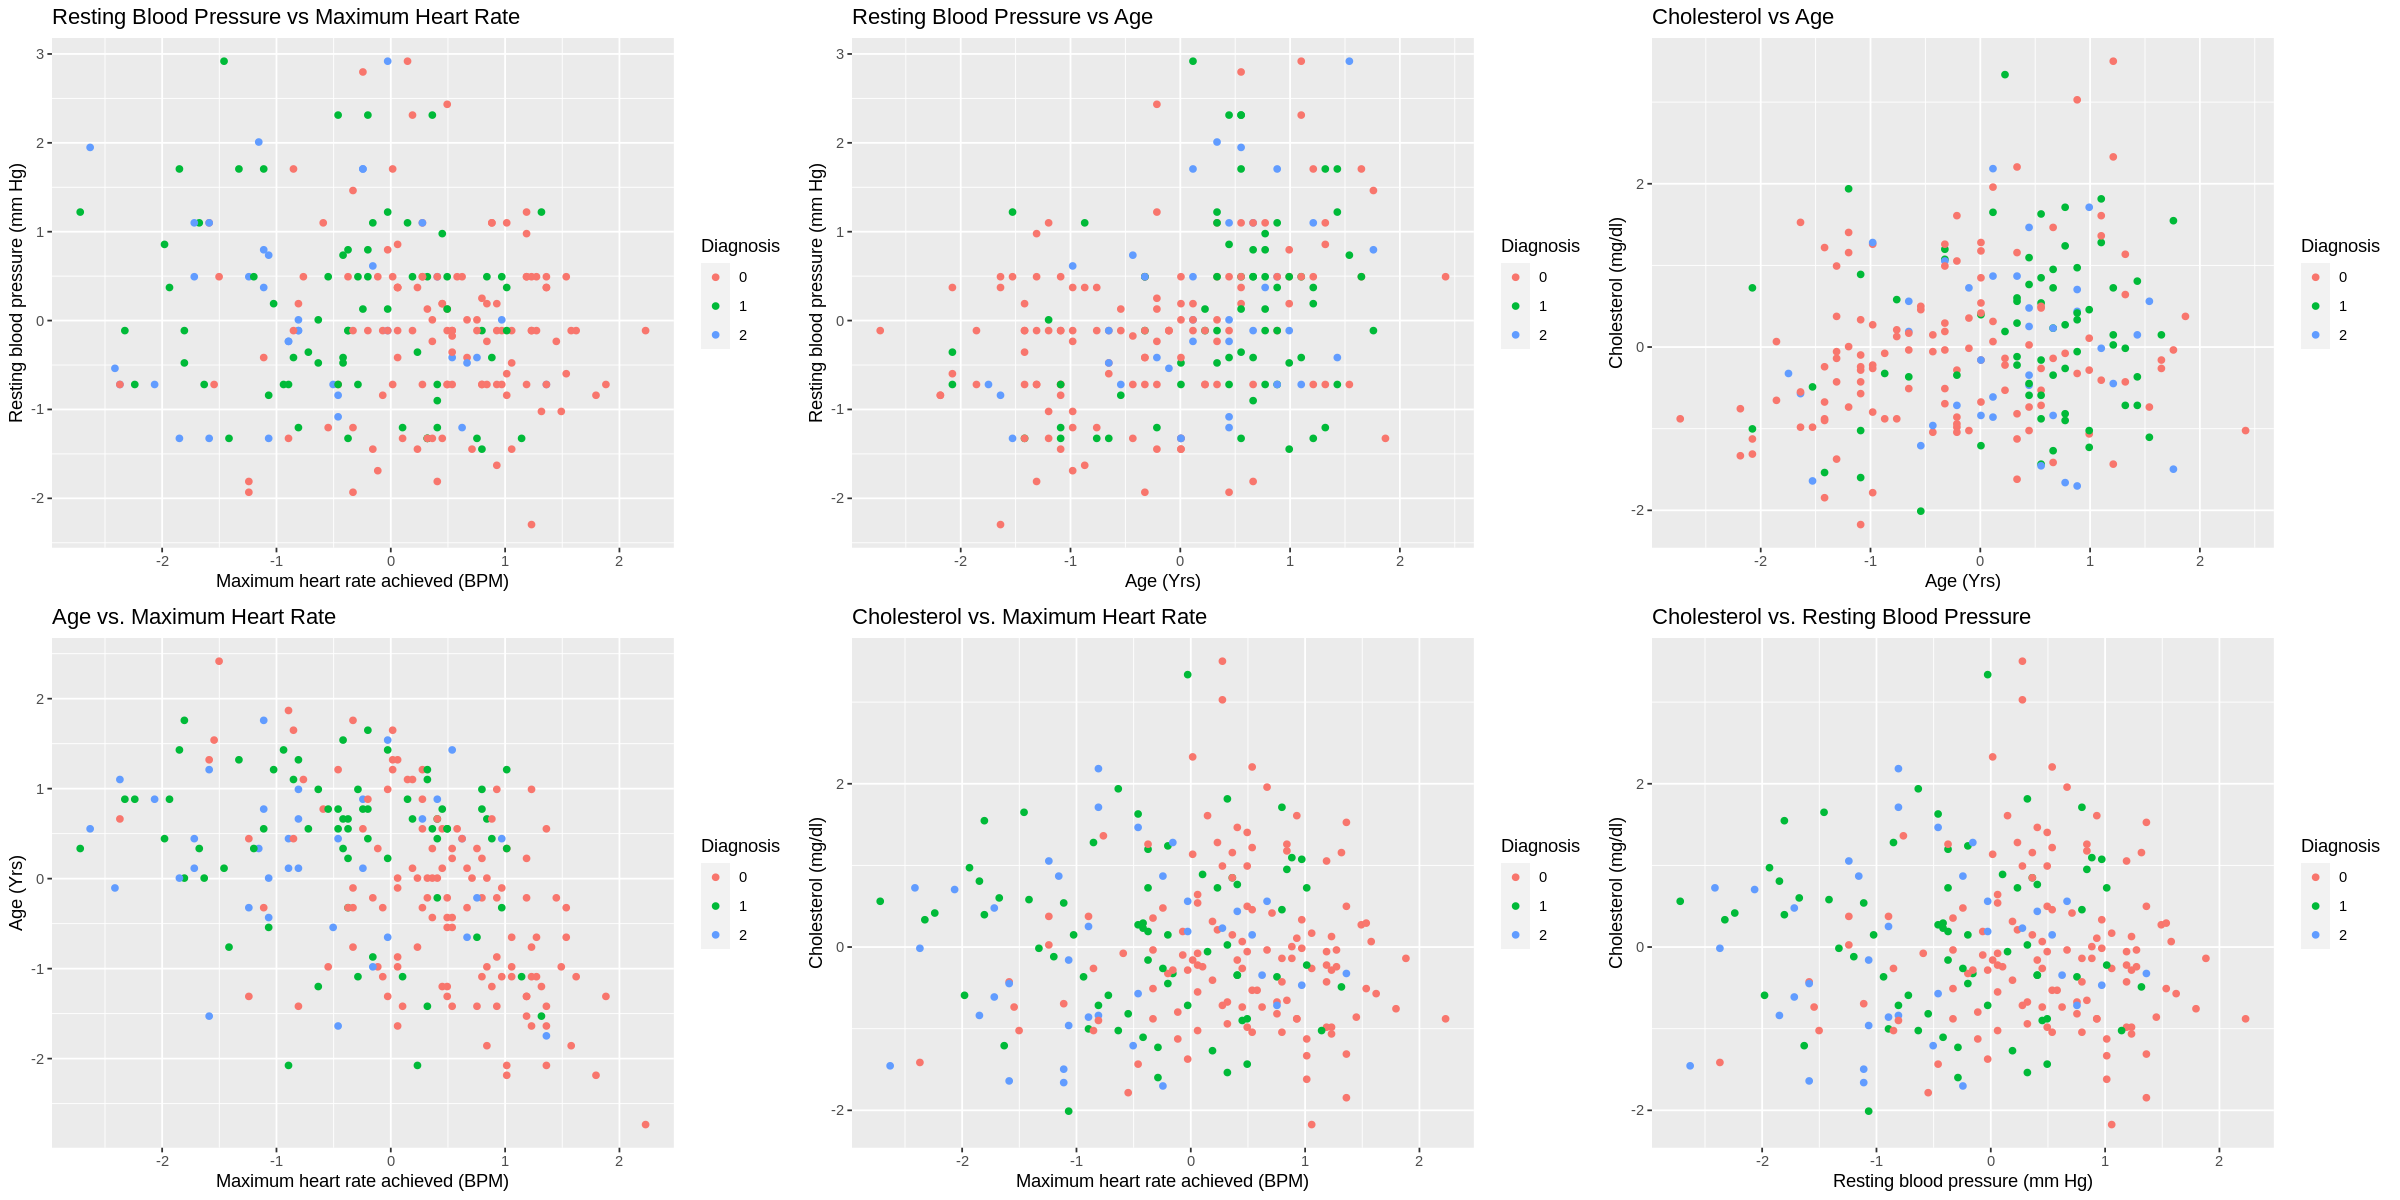

In [6]:
scaled_heart_disease <- disease_num_train %>% 
   mutate(across('age':'thal', scale))
options(repr.plot.height = 10, repr.plot.width = 20)
exp_plot_num1<-ggplot(scaled_heart_disease,aes(x=thalach,y=trestbps,color=as_factor(pred))) +
           geom_point() +
           xlab('Maximum heart rate achieved (BPM)') +
           ylab('Resting blood pressure (mm Hg)') +
           labs(color='Diagnosis') +
           ggtitle('Resting Blood Pressure vs Maximum Heart Rate')

exp_plot_num2<-ggplot(scaled_heart_disease,aes(x=age,y=trestbps,color=as_factor(pred))) +
           geom_point() +
           xlab('Age (Yrs)') +
           ylab('Resting blood pressure (mm Hg)')  +
           labs(color='Diagnosis') +
           ggtitle('Resting Blood Pressure vs Age')
exp_plot_num3<-ggplot(scaled_heart_disease,aes(x=age,y=chol,color=as_factor(pred))) +
           geom_point() +
           xlab('Age (Yrs)') +
           ylab('Cholesterol (mg/dl)')  +
          labs(color='Diagnosis') +
           ggtitle('Cholesterol vs Age')
exp_plot_num4<-ggplot(scaled_heart_disease,aes(x=thalach,y=age,color=as_factor(pred))) +
           geom_point() +
           xlab('Maximum heart rate achieved (BPM)') +
           ylab('Age (Yrs)')  +
           labs(color='Diagnosis') +
           ggtitle('Age vs. Maximum Heart Rate')
exp_plot_num5<-ggplot(scaled_heart_disease,aes(x=thalach,y=chol,color=as_factor(pred))) +
           geom_point() +
           xlab('Maximum heart rate achieved (BPM)') +
           ylab('Cholesterol (mg/dl)')  +
           labs(color='Diagnosis') +
           ggtitle('Cholesterol vs. Maximum Heart Rate')
exp_plot_num6<-ggplot(scaled_heart_disease,aes(x=thalach,y=chol,color=as_factor(pred))) +
           geom_point() +
           xlab('Resting blood pressure (mm Hg)') +
           ylab('Cholesterol (mg/dl)')  +
           labs(color='Diagnosis') +
           ggtitle('Cholesterol vs. Resting Blood Pressure')
var_compare_num<-plot_grid(exp_plot_num1, exp_plot_num2, exp_plot_num3, exp_plot_num4, exp_plot_num5, exp_plot_num6, ncol = 3)
var_compare_num

Graph 1.0 : Relationships between several predictors in the data set. Some show clearer divisions than others.

**Forward Loop**

Observing the above visualizations, it is clear that some combinations of predictors carry more predictive power than others. There is no distinct relationship between cholesterol level, age of patient, and pred, for instance. This is not ideal, since building a classifier with these variables will not lead to accurate predictions. Moreover, since we have 13 predictors in total, it is very time consuming to find the best selection of predictors. Therefore, we'll be doing forward selection to find the combination of predictors that produces the most accurate classifier.

In [7]:
#Extract a list of column names for the forward loop
names <- colnames(disease_num_train %>% select(-pred)) 

#Create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
disease_vfold <- vfold_cv(disease_num_train, v = 5, strata = pred)

To prepare for forward selection, and for convenience, a list of column names is created using colnames, with the response variable pred removed.

Next, we created model specification "knn_spec", setting the neighbors argument as tune(), engine as "kknn", and mode as "classification" as a preparation for the for loops in the next section. We also created disease_vfold for 5-fold cross validation to be used in the calculation of different combinations of predictors' accuracy.

In [8]:
#Create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

#Store the total number of predictors
n_total <- length(names)

#Stores selected predictors
selected <- c()

An empty tibble "accuracies" is created to store the results of each iteration. For this tibble, the data type of the amount of predictors is integer, the model_string (part of the recipe) is defined as a character data type, and accuracy is defined as a double data type. 

The number n_total is created from the length of the names list, representing the total number of predictors. An empty vector named "selected" is created for foward selection to store selected predictors.

In [9]:
# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("pred", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        disease_recipe <- recipe(as.formula(model_string), 
                                data = disease_num_train) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(disease_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = disease_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

In [10]:
options(repr.matrix.max.rows = 13)
accuracies
options(repr.matrix.max.rows = 6)

size,model_string,accuracy
<int>,<chr>,<dbl>
1,pred ~ ca,0.6366140
2,pred ~ ca+cp,0.6768204
3,pred ~ ca+cp+thal,0.7222661
4,pred ~ ca+cp+thal+oldpeak,0.7354062
5,pred ~ ca+cp+thal+oldpeak+fbs,0.7317567
6,pred ~ ca+cp+thal+oldpeak+fbs+sex,0.7182126
7,pred ~ ca+cp+thal+oldpeak+fbs+sex+age,0.7359903
8,pred ~ ca+cp+thal+oldpeak+fbs+sex+age+slope,0.7181116
9,pred ~ ca+cp+thal+oldpeak+fbs+sex+age+slope+exang,0.7135617


Table3.0: accuracies of predictor combinations from size 1 to 13


**Examining the Results**

Unfortunately the for loops cannot be broken down into small sections, but the overall logic is simple. The forward selection conducted consists of two for loops. For the first for loop, the range is from 1 to n_total. In the first loop, we firstly create lists accs and models. If i is in the range for the first loop, then it will enter the second loop. For the second loop, the range is from 1 to length of names (13). The goal of the first two steps of the second loop is to select predictors and make the response variable ~ predictors combination. This combination is defined as model_string, which will then be used to produce the recipe disease_recipe. As forward selection progresses, model_string will depend on newly entered variables, which eventually changes information entered in the recipe. After the recipe is made, a workflow is assembled. Just like all the workflows studied in class, add_recipe and add_model adds the recipe and specification made earlier. Tune grid, collect metrics, filter, and summaries(mx = max(mean) selects the best k, filters the accuracy, and collects the highest accuracy for the best k. This accuracy value collected is unlisted and stored in acc. The second loop ends with acc and model string collected as j. Finally, we create a variable called jstar, which is essentially the highest accuracy for each size of combinations of predictors. Values of Jstar, which is its size, model_string, and respective accuracy is stored in the tibble "accuracies". In the last stage of the first loop, we put all of the calculated variables back to names and vector "selected", and remove jstar from names (for preparation for the next loop). The for loops will keep on running until i > n_total.

**Selecting the Best Number of Predictors**

First, the accuracy of the model with each number of predictors is plotted versus the number of predictors in the model.

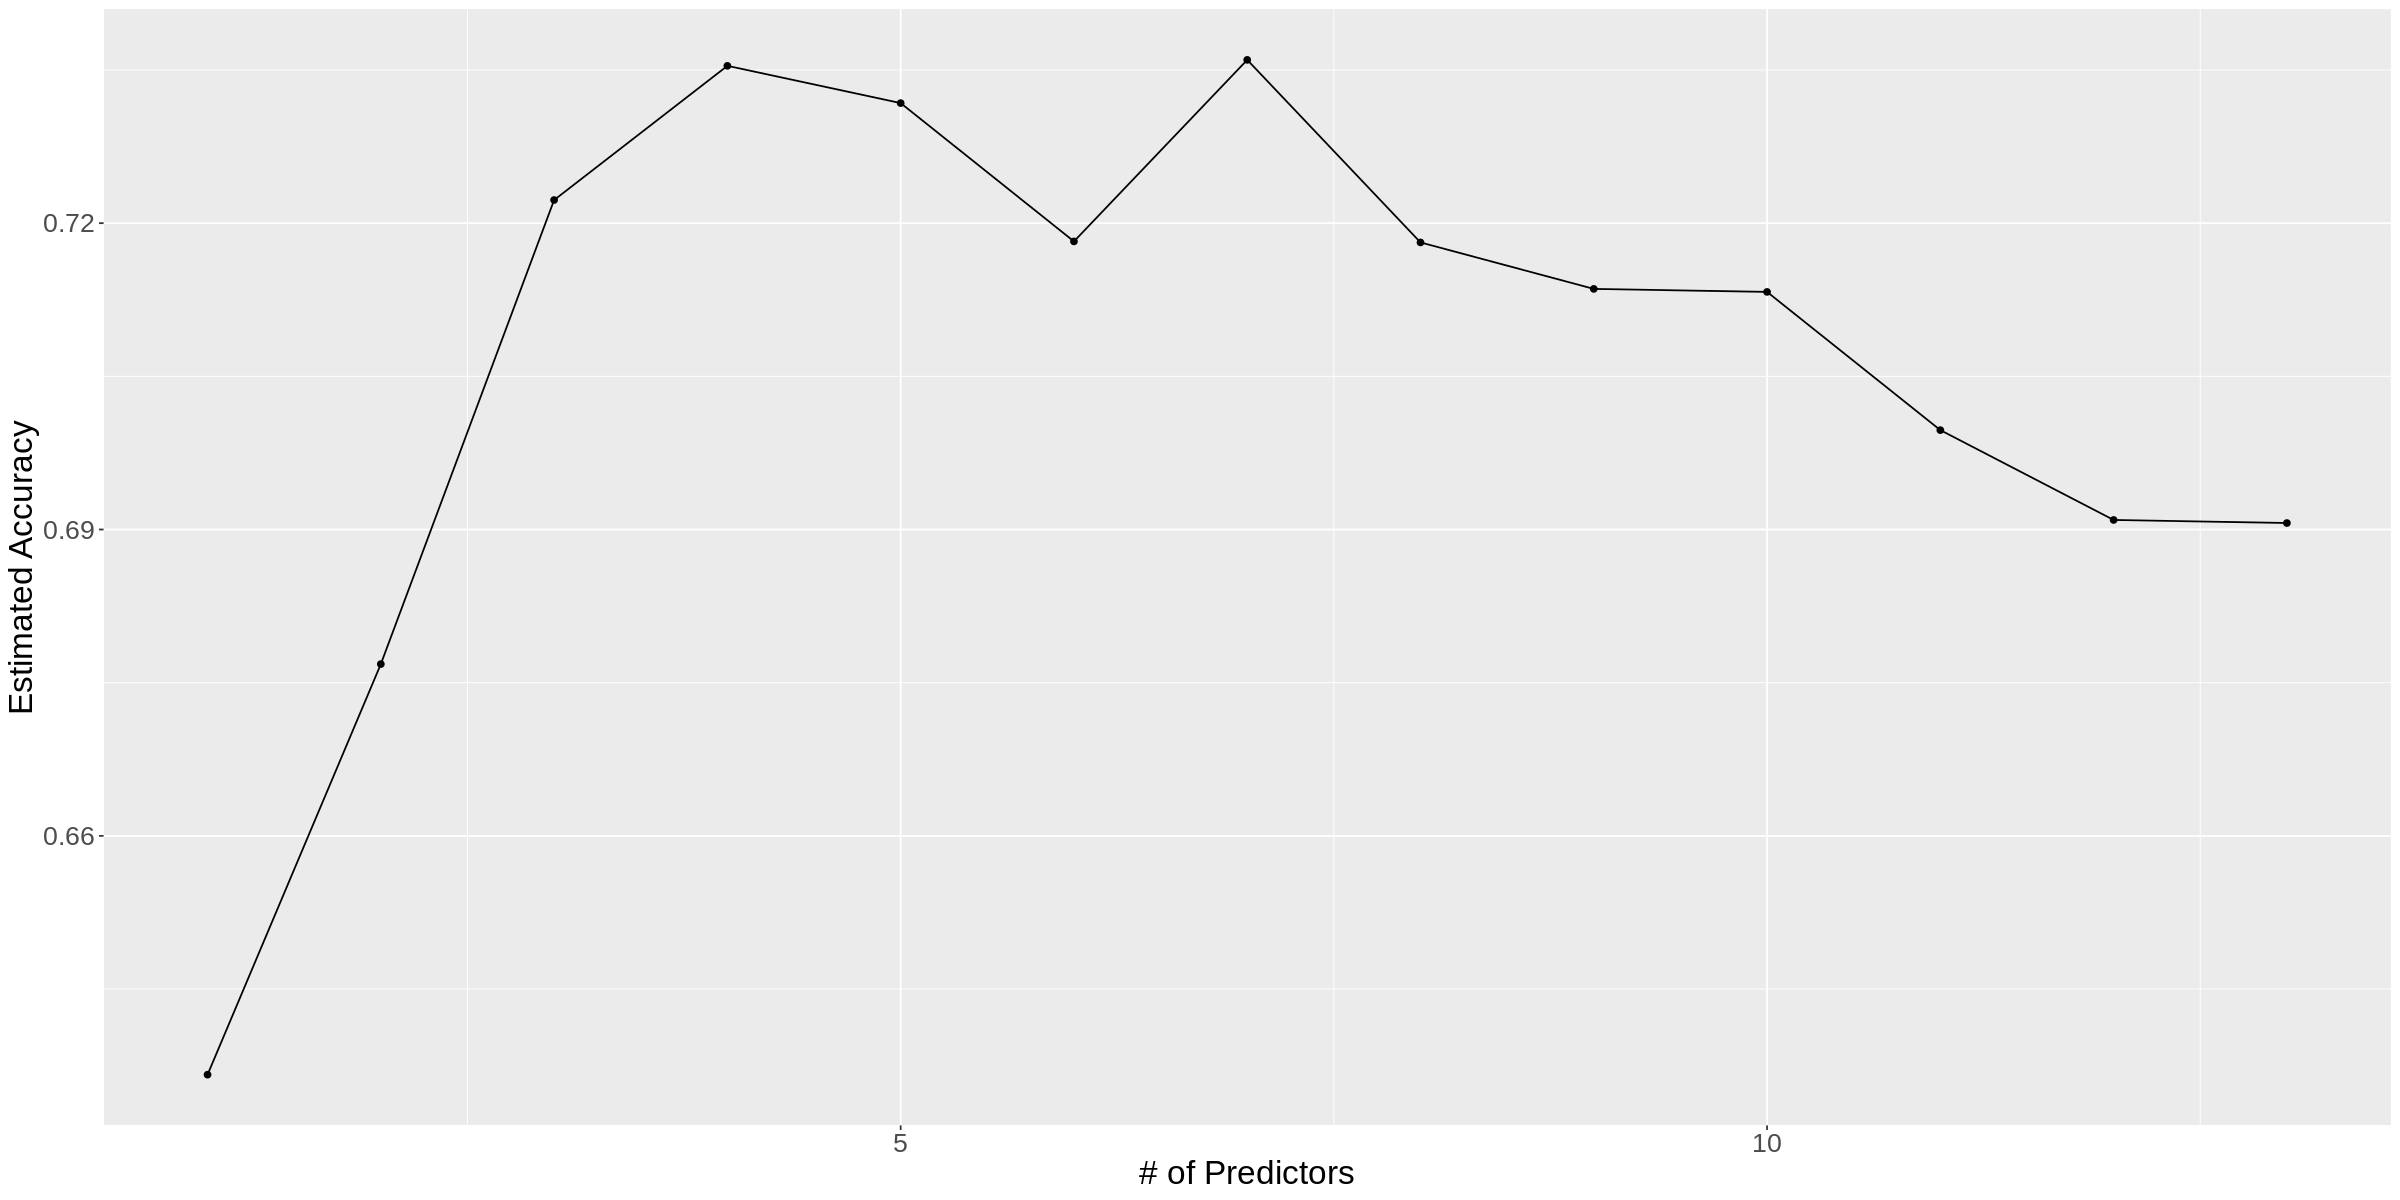

In [11]:
accuracy_plot<-ggplot(accuracies,aes(x=size,y=accuracy))+
               geom_point()+
               geom_line()+
               xlab('# of Predictors')+
               ylab('Estimated Accuracy')+
               theme(text = element_text(size = 20))
accuracy_plot

We want to balance high accuracy and model simplicity in order to lower overfitting and random noise introduced from irrelevant predictors. This is done by finding the elbow in the above plot, as this is where the accuracy stops significantly increasing, then levels off and starts decreasing. For our analysis, this seems to occur in the 3-5 range, and we chose to use 3 predictors.

In [12]:
options(repr.matrix.max.rows = 13)
max1 <- arrange(accuracies, accuracy)
max1
options(repr.matrix.max.rows = 6)

size,model_string,accuracy
<int>,<chr>,<dbl>
1,pred ~ ca,0.6366140
2,pred ~ ca+cp,0.6768204
13,pred ~ ca+cp+thal+oldpeak+fbs+sex+age+slope+exang+thalach+restecg+chol+trestbps,0.6906368
12,pred ~ ca+cp+thal+oldpeak+fbs+sex+age+slope+exang+thalach+restecg+chol,0.6909354
11,pred ~ ca+cp+thal+oldpeak+fbs+sex+age+slope+exang+thalach+restecg,0.6997321
10,pred ~ ca+cp+thal+oldpeak+fbs+sex+age+slope+exang+thalach,0.7132675
9,pred ~ ca+cp+thal+oldpeak+fbs+sex+age+slope+exang,0.7135617
8,pred ~ ca+cp+thal+oldpeak+fbs+sex+age+slope,0.7181116
6,pred ~ ca+cp+thal+oldpeak+fbs+sex,0.7182126


Table 3.1: Arranged accuracies of predictors.

In [13]:
#find k
disease_best_recipe <- recipe(pred~ca+cp+thal, 
                                data = disease_num_train) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

disease_vfold_1 <- vfold_cv(disease_num_train, v = 5, strata = pred) 

k_vals <- tibble(neighbors = seq(from = 1, to = 40))

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

knn_accuracies <- workflow() %>%
  add_recipe(disease_best_recipe) %>%
  add_model(knn_spec) %>%
  tune_grid(resamples = disease_vfold_1, grid = k_vals) %>%
  collect_metrics() %>%
  filter(.metric == "accuracy") %>%
  select(neighbors, mean) %>%
  arrange(mean)

knn_accuracies

neighbors,mean
<int>,<dbl>
1,0.6001361
2,0.6131752
3,0.6767106
⋮,⋮
18,0.7173210
9,0.7219631
10,0.7355995


Table 4.1: Neighbours and their mean accuracy.

**Visualization of Accuracy**

Now by completing the forward selection we have the combination of predictors that produces the classifier with the highest accuracy.  Using this information, disease_best_recipe is created. To select the best k value, a new 5-fold cross validation is created using disease_num_train. Afterward, the new recipe and knn_spec is added to a workflow  that uses tune_grid to calculate the accuracies of the classifier with different k values. After using collect_metrics, filter, select, and arrange functions that collects the accuracies of the classifier, we can plot the accuracies as follows.

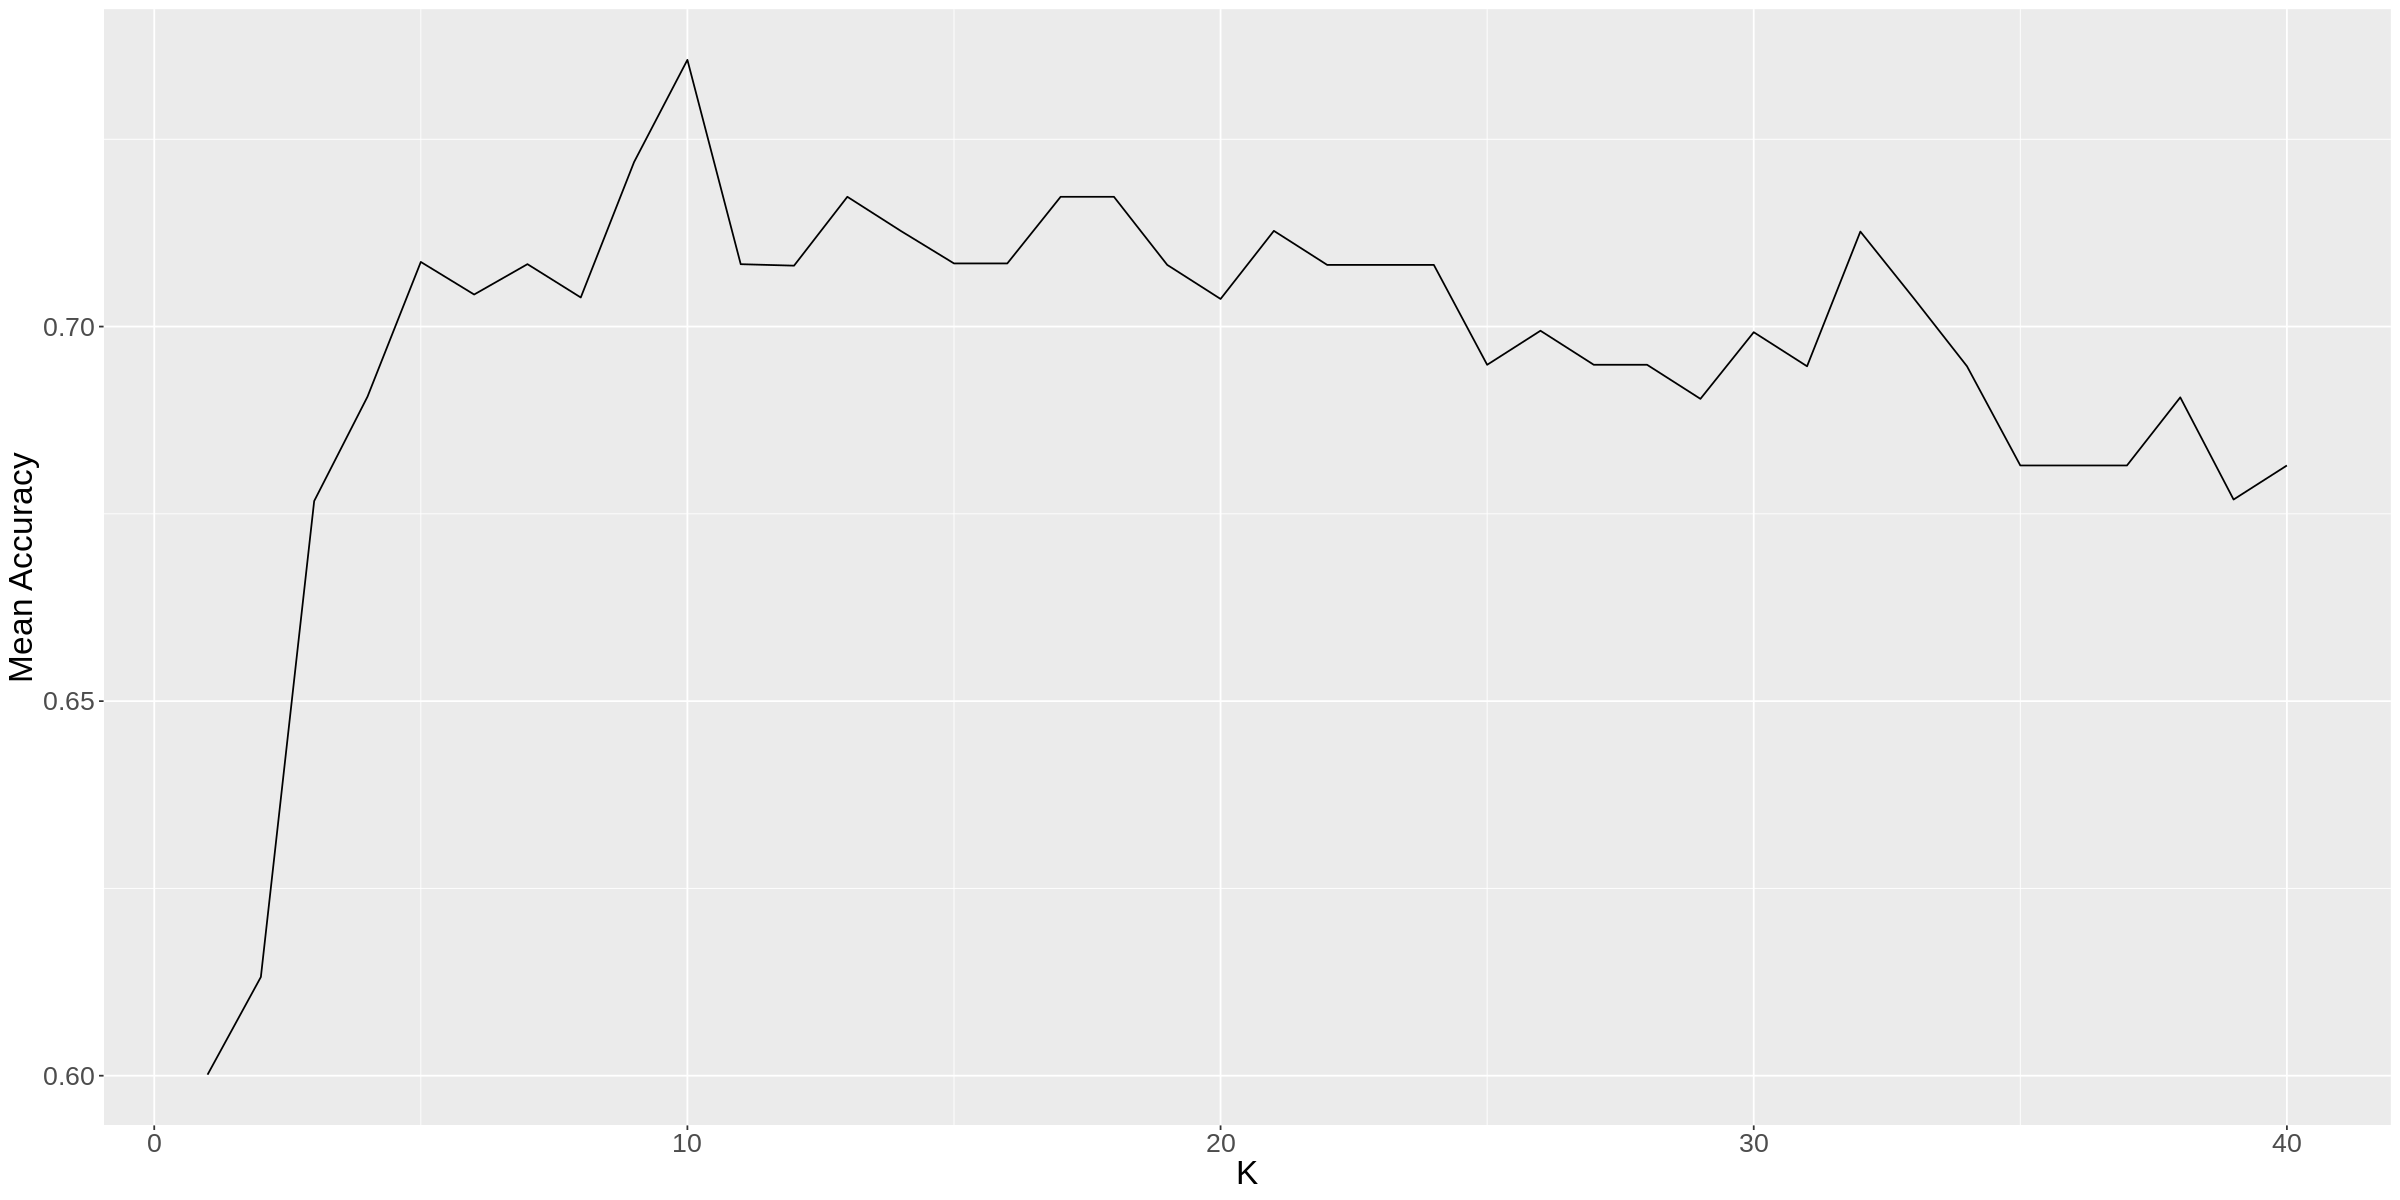

In [14]:
k_line <- ggplot(knn_accuracies, aes(x = neighbors, y = mean)) +
  geom_line() +
  xlab("K") +
  ylab("Mean Accuracy") +
  theme(text = element_text(size = 20))
k_line

Graph4.0: Visulization for the k values and mean accuracies.

Overall, the accuracy is reasonably level after k=4. Since there is relative stability, we chose k=7, as this has the highest accuracy in the tested range.

**Final Calculation**

Calculate the accuracy of the classifier by first finalizing the recipe (k=20), add this recipe to a workflow and train the classifier with disease_num_train using the fit function. Finally, use predict function to predict the "pred" for disease_num_test dataset. Use bind_cols, metrics, filter, select, and pull function to calculate the accuracy of the classifier and filter out unnecessary information.

In [15]:
#final calculation

disease_best_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = 7) %>%
     set_engine("kknn") %>%
     set_mode("classification")


knn_fit <- workflow() %>%
  add_recipe(disease_best_recipe) %>%
  add_model(disease_best_spec) %>%
  fit(data = disease_num_train)

disease_predict <- predict(knn_fit, disease_num_test) %>%
    bind_cols(disease_num_test) %>%
    metrics(truth = pred, estimate = .pred_class) %>%
    filter(.metric == "accuracy") %>%
    select(.estimate) %>%
    pull()
disease_predict

[1] 0.6216216

# Discussion

* Summary of results 

Observing the analysis above, loading and wrangling the data had produced a dataset with response variable “num (diagnosis of heart disease)” and 13 predictors, respectively being age, sex, chest pain type, resting blood pressure, cholesterol level, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise induced angina,  ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels (0-3) colored by fluoroscopy, and thalassemia diagnosis. While visualizing the data by creating scatterplots between several different variables, and coloring by heart disease diagnois, showed certain correlations between variables, it is not possible to determine the ideal combination from these alone as there is an untractably large amount of possible combinations. After running the double for loop on the disease_num_training dataset, the combination of the 3 predictors ca, cp, and thal produced a relatively high accuracy (0.722) while using fewer predictors and reducing the chances of overfitting. Moreover, when studying the predictors individually, it is discovered that the predictor “ca (number of major blood vessels coloured by fluoroscopy)” has the strongest correlation with response variable “pred (heart disease diagnosis)”, achieving an accuracy of 0.637, the highest when compared with other predictors.

By creating a new recipe and applying cross validation with the k value in the recipe specified as “tune ()” to disease_num_train (k ranging from 1 to 40), we found that in the 4-40 neighbours range, the model has both the highest accuracy (0.675-0.725) and is relatively stable when changing k values. Therefore, we decided to use k=7 for our final model, as this had the highest accuracy in this region. Finally, after rebuilding the recipe with k = 7, and using the classifier to predict the response variable “pred” on the test dataset, the accuracy of the classifier is at 0.622. Although the accuracy of the classifier is lower than expected, this accuracy is quite reasonable for a limited dataset and a relatively simple model. Heart disease is a complicated problem and can be influenced by many factors. Additionally, the health condition of patients can be very different from one another, making the creation of an accurate classifier really hard. Nonetheless we are quite happy with our classifier, as we believe it is the best classifier we can create with our current ability.

* Impact of Results

Discovering which factors of a person’s health status are significant predictors for heart disease has several benefits. First of all, discovering strongly correlated predictors like chest pain type and number of major vessels colored by fluoroscopy allows for those predictors to be used as a sort of “early warning sign” for further diagnosis. Next, creating accurate models for predicting heart disease allows for people who are particularly at risk to take preventative measures.


 * Were the results what we expected?

The results of this analysis met some of our expectations from the initial data analysis. Cholesterol, for instance, did not initially appear to lead to much distinction between heart disease diagnoses, and the most accurate models don't include it as a predictor. However, some predictors that visually appeared to have strong predictive power, like the maximum heart rate reached, aren’t in some of the top models. This shows that predictive power of variables in isolation is not the only factor worth considering. In fact, different combinations of predictors can lead to different results, even if the individual variables might not have the strongest predictive power. 

* Future Questions

After using the forward selection to predict what factors have the highest accuracy against the num or predicted attribute, it is clear to see how data science can help the medical field. Regarding heart disease there could be future models that involve other medical datasets. 
In this project the method of forward selection was used to compare the risk factors, it would be interesting to see how these results compare to other learning machine techniques. A future project could be comparing the results and accuracy of the forward selection to another method. Future methods could include a Support Vector Classifier, Decision Tree Classifier, and Random Forest Classifier (Chang, Bhavani, Xu, & Hossain, 2022). 


# References

Chang, V., Bhavani, V. R., Xu, A. Q., & Hossain, M. A. (2022). An artificial intelligence model for heart disease detection using machine learning algorithms. Healthcare Analytics, 2, 100016. doi:https://doi.org/10.1016/j.health.2022.100016

Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Kelley, Deeanna (2014) "Heart Disease: Causes, Prevention, and Current Research," JCCC Honors Journal: Vol. 5 : Iss. 2 , Article 1.Available at: https://scholarspace.jccc.edu/honors_journal/vol5/iss2/1  



